In [3]:
#Data handling Imports
import pandas as pd
import numpy as np
#Notebook arrange Imports
import warnings
warnings.filterwarnings('ignore')
#Visualisation Imports
import seaborn as sns
import pylab
pylab.style.use('seaborn-pastel')
import matplotlib.pyplot as plt
%matplotlib inline
#Normalization & Scaler Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
#Sampling Imports
from sklearn.model_selection import KFold
#Modeling Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#Accuracy Validation Imports
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, f1_score, accuracy_score,precision_recall_curve,\
confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score


In [4]:
#Read the dataset
df = pd.read_csv("/content/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Exploratory Data Analysis(EDA)

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

In [7]:
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

Univariate Analysis

In [8]:
Channel_df=df['Channel'].value_counts().reset_index()
Channel_df.rename(columns={'index': 'Channel_type'}, inplace=True)
Channel_df.rename(columns={'Channel': 'Count'}, inplace=True)
Channel_df.head()

,Channel_type,Count
0,1,298
1,2,142


<Axes: title={'center': 'Distribution of Channel_type'}, xlabel='Channel_type', ylabel='Count'>

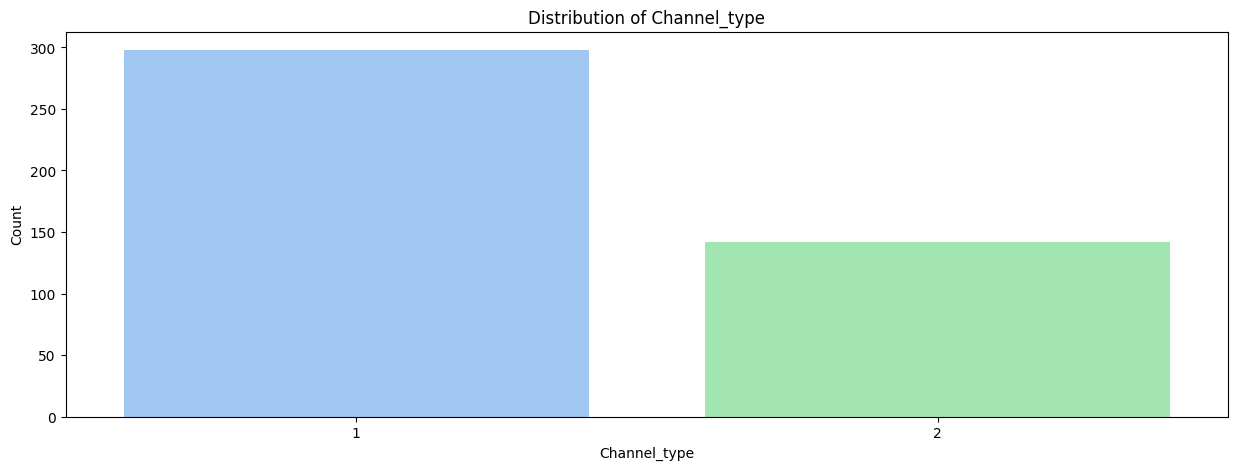

In [9]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Channel_type')
sns.barplot(x='Channel_type',y='Count',data=Channel_df)

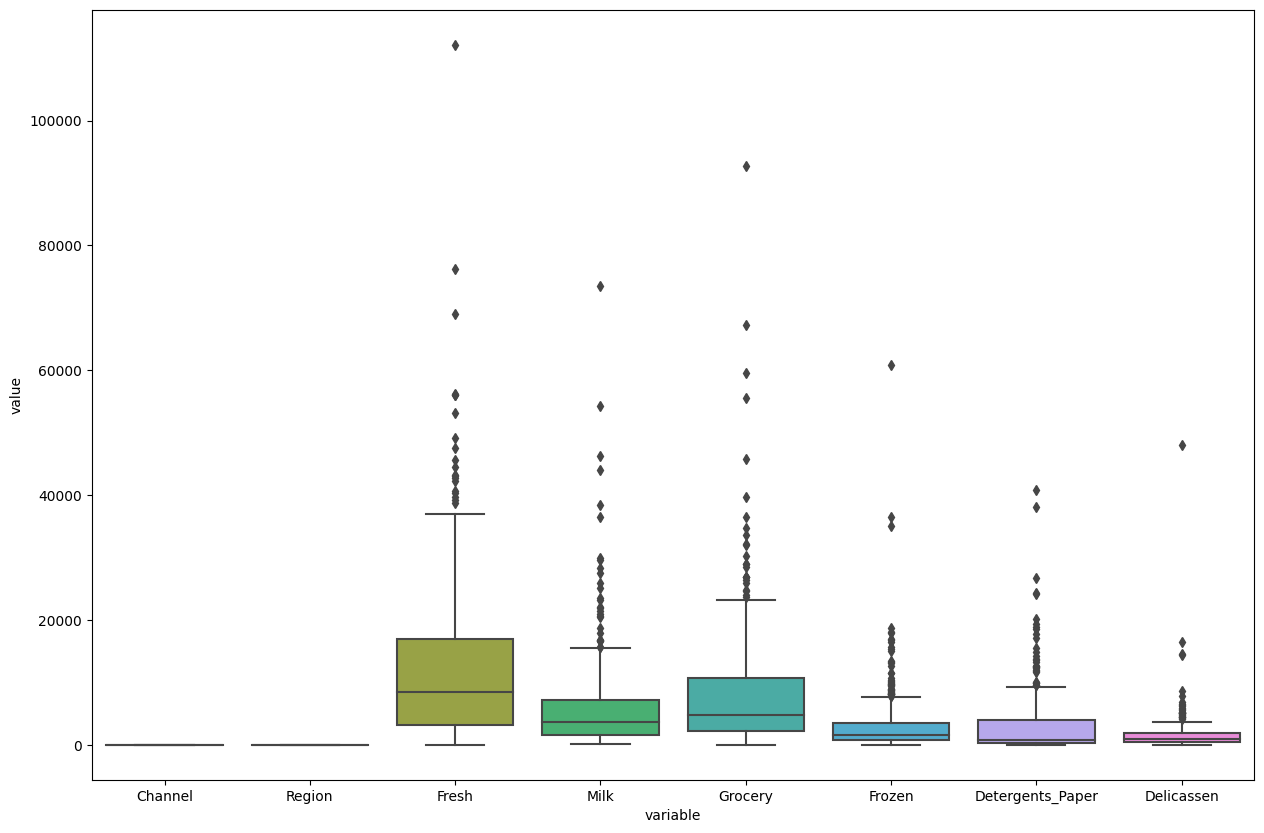

In [10]:
#Boxplot of each column
plt.figure(figsize=(15,10))
sns.boxplot(x='variable', y='value', data=df.melt())

plt.show()

Bivariate Analysis

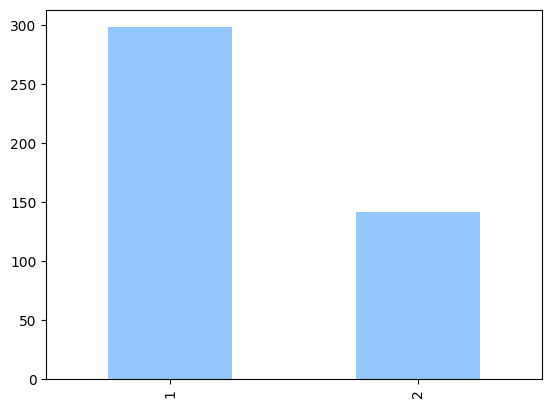

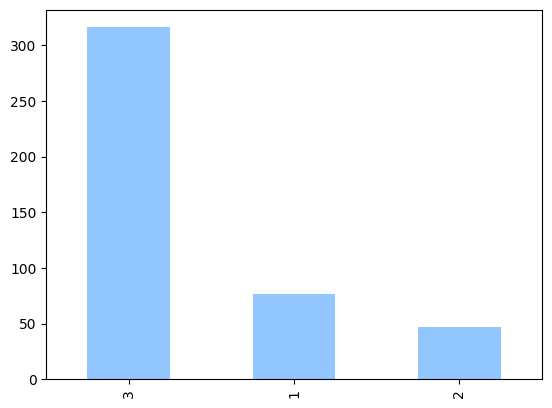

In [11]:
def categorical_data(i):
    df[i].value_counts().plot(kind='bar')

j_1 = ['Channel','Region']

for k in j_1:
    categorical_data(i=k)
    plt.show()

In [12]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Correlation Heat map of the data


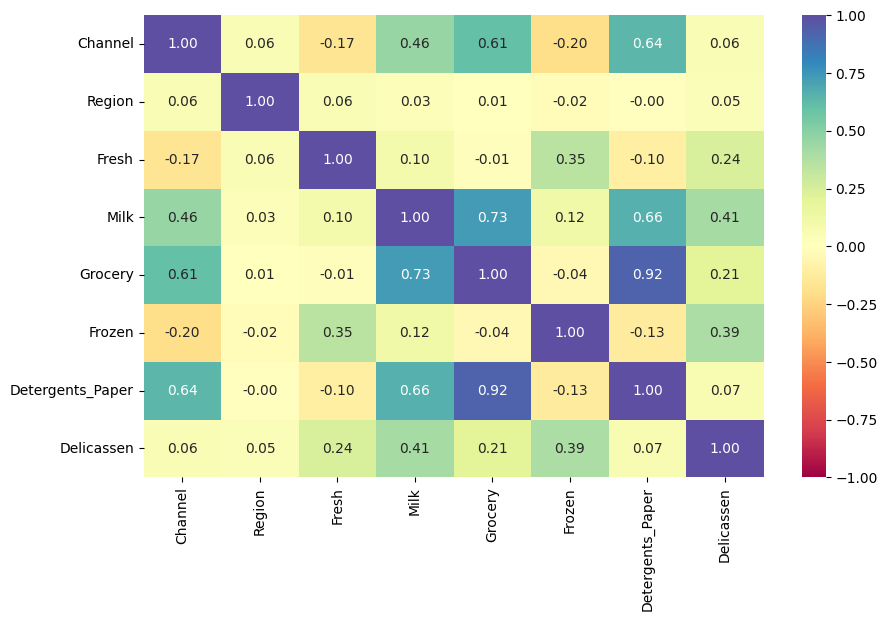

In [13]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

<Axes: xlabel='Milk', ylabel='Grocery'>

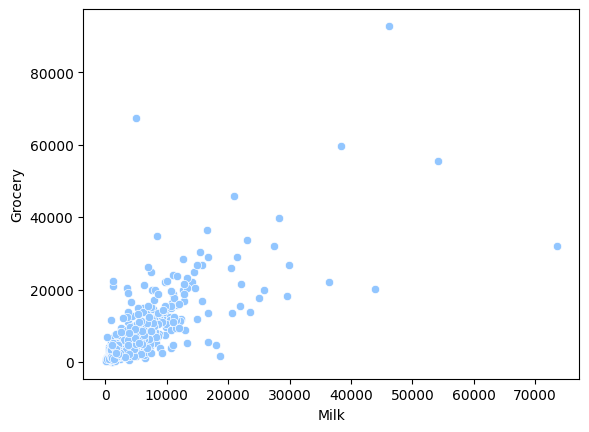

In [14]:
sns.scatterplot(x='Milk',y='Grocery',data=df)

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

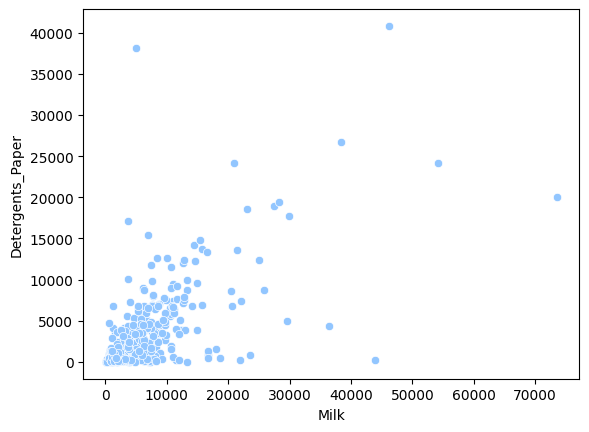

In [15]:
sns.scatterplot(x='Milk',y='Detergents_Paper',data=df)

<Axes: xlabel='Detergents_Paper', ylabel='Grocery'>

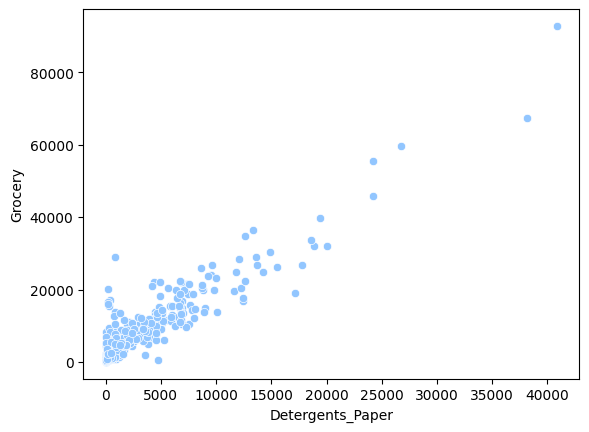

In [16]:
sns.scatterplot(x='Detergents_Paper',y='Grocery',data=df)

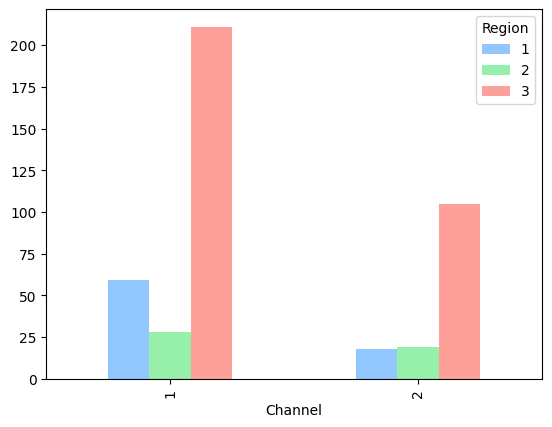

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [17]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')

Multivariate Analysis

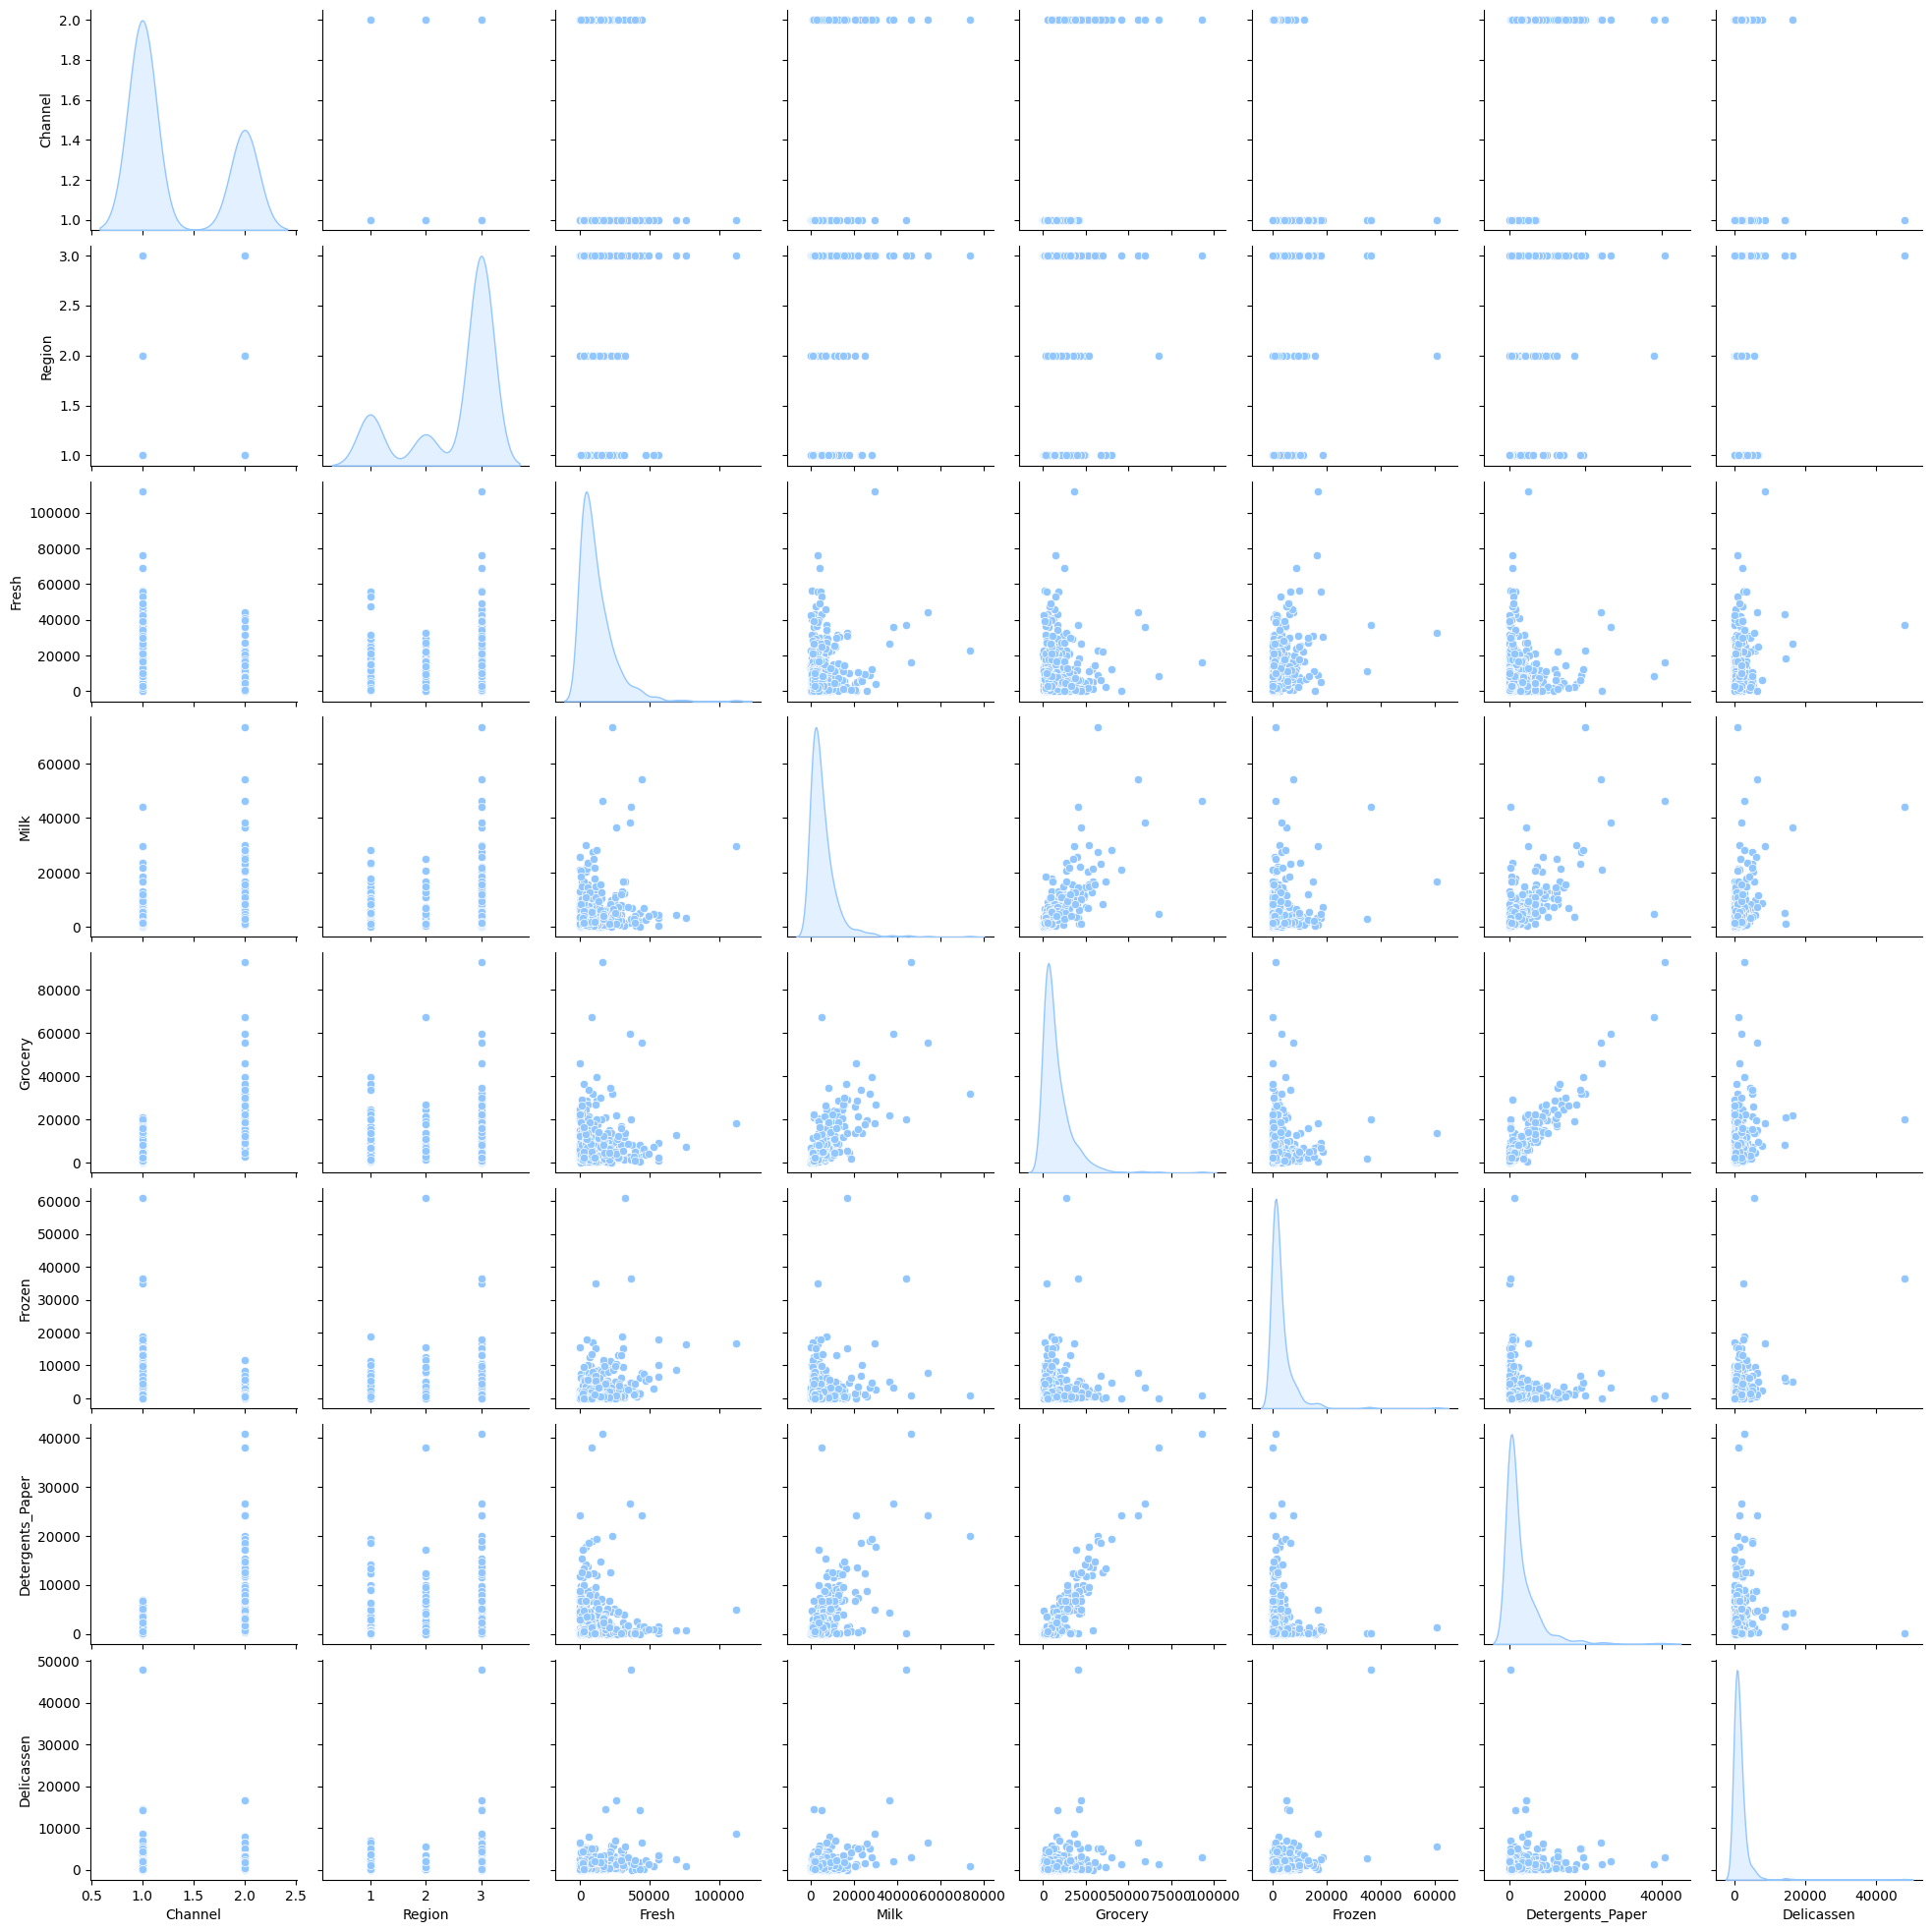

In [18]:
sns.pairplot(df, diag_kind='kde')

plt.show()

Descriptive Analysis

In [19]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Data Preprocessing**

Handling Missing Values

In [20]:
#Checking for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Handling categorical data

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Handling outliers

In [22]:
#defining a function to replace outliers with median
def replace_outliers_with_median(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else df.median())

In [23]:
numerical_features = df.select_dtypes(include=[np.number])
df[numerical_features.columns] = df[numerical_features.columns].apply(replace_outliers_with_median)

In [24]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,10033.079545,4281.829545,6218.863636,1896.656818,1806.022727,1084.296591
std,0.468052,0.774272,8450.546022,3402.380107,5339.702492,1674.915834,2257.986747,840.423787
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8489.500000,3623.500000,4754.750000,1521.500000,814.750000,964.750000
75%,2.000000,3.000000,14792.000000,6202.000000,8860.750000,2534.000000,2688.000000,1525.000000
max,2.000000,3.000000,37036.000000,15488.000000,23127.000000,7683.000000,9265.000000,3637.000000


In [25]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Splitting the data into train and test

In [26]:
X = df.drop('Channel', axis=1)
Y = df['Channel']

In [27]:
#using 5 folds split the data.
skf = KFold(n_splits=5)
for train_index,test_index in skf.split(X, Y):
  X_train, X_test = X.loc[train_index],X.loc[test_index]
  Y_train, Y_test = Y.loc[train_index],Y.loc[test_index]


print('{:<15} {:<15} {:<15}'.format('DataSet','Features','Label'))
print('{:<15} {:<15} {:<15}'.format('Train',X_train.shape[0],Y_train.shape[0]))
print('{:<15} {:<15} {:<15}'.format('Test',X_test.shape[0],Y_test.shape[0]))

DataSet         Features        Label          
Train           352             352            
Test            88              88             


In [28]:
# Dataframe to store Model Performance Results
perf_cols = ['Model','Train Accuracy','Test Accuracy','F1-Score','Recall','Precision', 'AUC']
df_perf = pd.DataFrame(columns = perf_cols)

# DataFrame for Confusion matrix
conf_mat_cols = ['Model','False Negatives','False Positives','True Negatives','True Positives']
df_cm = pd.DataFrame(columns = conf_mat_cols)

# DataFrame for cross validation scores
cv_cols = ['Model','Best_Cross_Val_Score']
df_cv = pd.DataFrame(columns = cv_cols)

In [29]:
# Function to print Confusion Matrix and Classification Report
def model_perf(model, Y_test, Y_predict, algorithm, df_cm, df_perf, ax=None, plot = True):
    # confusion_matrix
    conf_mat = confusion_matrix(Y_test, Y_predict)

    # get accuracy of model
    acc_score = accuracy_score(Y_test, Y_predict)
    print(f"Accuracy of {algorithm} for Test data is {acc_score*100}\n")

    # get F1-score of model
    f1score = f1_score(Y_test, Y_predict)
    print(f"F1-score of {algorithm} for Test data is {f1score*100}\n")

    # get the classification report
    class_report = classification_report(Y_test, Y_predict)
    print(f"Classification report for {algorithm} is: \n {class_report}")

    # AUC Calculations - false positive rates, true positive rates and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict, pos_label=1)

    #area_under_curve
    roc_auc = round(metrics.auc(fpr, tpr)*100,2)
    print(f"AUC for {algorithm}: {roc_auc}\n")

    #Train Accuracy score
    train_acc = round(model.score(X_train,Y_train) * 100,2)

    #Test Accuracy score
    test_acc = round(model.score(X_test,Y_test) * 100,2)

    precision,recall,fscore,support = precision_recall_fscore_support(Y_test,Y_predict)

    #Appending into the dataframe
    df_perf = df_perf.append({'Model' : algorithm,'Train Accuracy' : train_acc,'Test Accuracy' : test_acc, 'F1-Score' : fscore[1],'Recall' : recall[1], 'Precision' : precision[1], 'AUC' : roc_auc}, ignore_index=True)

    df_cm = df_cm.append({"Model" : algorithm, "True Positives" : conf_mat[1][1], "True Negatives" : conf_mat[0][0], "False Positives" : conf_mat[0][1], "False Negatives" : conf_mat[1][0]}, ignore_index=True, sort=False)

    if plot:
        def conf_plot1(ax = None):
            if ax is None:
                fig, ax = plt.subplots()
            # For label annotations in confusion_matrix
            label_names = ['True -ve','False +ve','False -ve','True +ve']
            label_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]
            labels = [f'{v1}\n{v2}' for v1, v2 in zip(label_names,label_counts)]
            labels = np.asarray(labels).reshape(2,2)

            # Draw heatmap using confusion matrix
            cmap = sns.diverging_palette(220, 10, as_cmap=True)
            sns.heatmap(conf_mat, cmap = cmap, annot=labels, fmt='')
            ax.set_xlabel('Actual Values')
            ax.set_ylabel('Predicted Values')
            #ax.show()

        #Line plot for ROC curve using fpr and tpr value
        def roc_plot2(ax = None):
            if ax is None:
                fig, ax = plt.subplots()
            ax.plot(fpr, tpr, color='red', label = 'AUC = %0.3f' % roc_auc)
            ax.set_title('Receiver Operating Characteristic (ROC)')
            ax.legend(loc = 'lower right')
            ax.plot([0, 1], [0, 1],linestyle='--') #Intersection line
            ax.set_xlabel('False Negative Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_xlim([0,1])
            ax.set_ylim([0,1])
            ax.set_xticks([i for i in np.arange(0,1.1,0.1)])
            ax.set_yticks([i for i in np.arange(0,1.1,0.1)])

        prec, rec, thres = precision_recall_curve(Y_test, Y_predict, pos_label=2)
        prec, rec, thres = list(prec), list(rec), list(thres)
        prec.pop()
        rec.pop()

        fig = plt.figure(figsize = (15,4))
        ax1 = fig.add_subplot(1,3,1)
        conf_plot1(ax1)
        ax2 = fig.add_subplot(1,3,2)
        roc_plot2(ax2)


    return df_cm, df_perf

K Neighbors Classifier

Text(0, 0.5, 'Error Value')

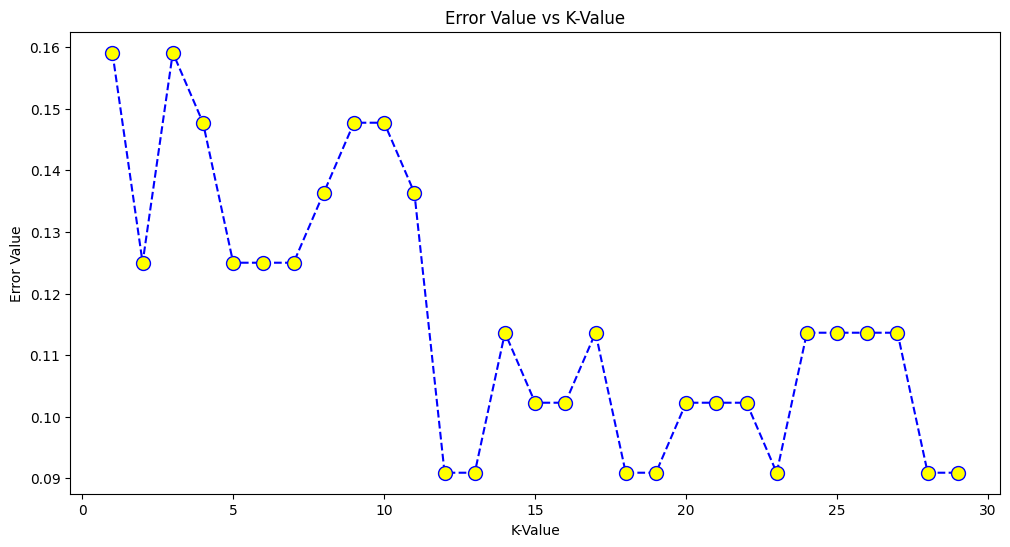

In [30]:
#Choosing K value
error_rate = []

for i in range(1,30):
    KNN_class = KNeighborsClassifier(n_neighbors = i)
    KNN_class.fit(X_train, Y_train)
    Y_predict = KNN_class.predict(X_test)
    #appending error rate that is not equal to test dataset
    error_rate.append(np.mean(Y_predict != Y_test))

#Plotting the plot to check the K value from graph
plt.figure(figsize = (12,6))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'yellow', markersize = 10)
plt.title('Error Value vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Value')

In [31]:
#As per above graph it seems neighbors 12 gives min error
KNN_class = KNeighborsClassifier(n_neighbors=12)

KNN_class.fit(X_train, Y_train)

Y_predict = KNN_class.predict(X_train)

print("Train Data Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = KNN_class.predict(X_test)

Train Data Model Accuracy: 84.9432


Accuracy of KNN for Test data is 90.9090909090909

F1-score of KNN for Test data is 94.20289855072464

Classification report for KNN is: 
               precision    recall  f1-score   support

           1       0.97      0.92      0.94        71
           2       0.71      0.88      0.79        17

    accuracy                           0.91        88
   macro avg       0.84      0.90      0.87        88
weighted avg       0.92      0.91      0.91        88

AUC for KNN: 10.11



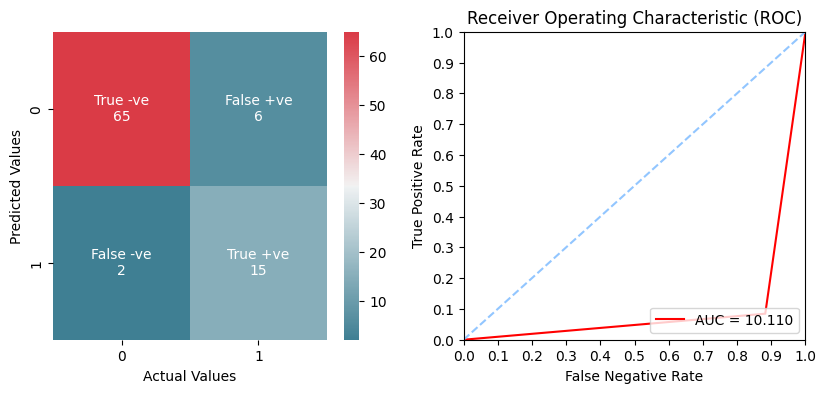

In [32]:
#Draw Model Performace, Confusion Matrix and Classification Report for KNN
df_cm, df_perf = model_perf(KNN_class, Y_test, Y_predict, "KNN", df_cm, df_perf, plot = True)

In [33]:
knn_score = cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv= 3,verbose = True, scoring = 'accuracy')
print("Accuracy for K-Neighbors Classifier using Cross Validation: %0.3f (+/- %0.3f)" % (knn_score.mean(), knn_score.std() * 2))

df_cv = df_cv.append({'Model':'KNeighborsClassifier','Best_Cross_Val_Score':"%0.2f (+/- %0.2f)" % ((knn_score.mean(), knn_score.std() * 2))},ignore_index=True, sort=False)

Accuracy for K-Neighbors Classifier using Cross Validation: 0.838 (+/- 0.049)


Naive-Bayes algorithm

In [34]:
GNB = GaussianNB()

GNB.fit(X_train, Y_train)

Y_predict = GNB.predict(X_train)

print("Train Data Model Accuracy: {0:.3f}".format(metrics.accuracy_score(Y_train, Y_predict)*100))

Y_predict = GNB.predict(X_test)

Train Data Model Accuracy: 84.659


Accuracy of Naive Bayes for Test data is 86.36363636363636

F1-score of Naive Bayes for Test data is 91.30434782608697

Classification report for Naive Bayes is: 
               precision    recall  f1-score   support

           1       0.94      0.89      0.91        71
           2       0.62      0.76      0.68        17

    accuracy                           0.86        88
   macro avg       0.78      0.83      0.80        88
weighted avg       0.88      0.86      0.87        88

AUC for Naive Bayes: 17.4



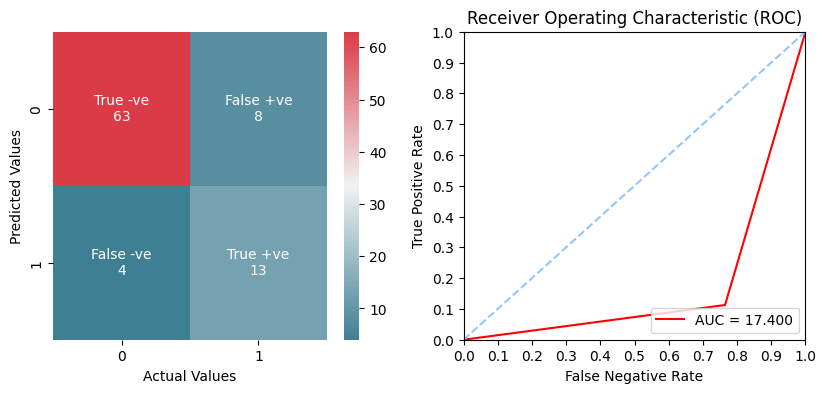

In [35]:
#Draw Model Performace, Confusion Matrix and Classification Report for Naive Bayes
df_cm, df_perf = model_perf(GNB, Y_test, Y_predict, "Naive Bayes", df_cm, df_perf, plot = True)

In [36]:
gnb_score = cross_val_score(GaussianNB(), X_train, Y_train, cv= 3, verbose = True, scoring = 'accuracy')
print("Accuracy for GaussianNB using Cross Validation: %0.3f (+/- %0.3f)" % (gnb_score.mean(), gnb_score.std() * 2))

df_cv = df_cv.append({'Model':'GaussianNB','Best_Cross_Val_Score':"%0.2f (+/- %0.2f)" % ((gnb_score.mean(), gnb_score.std() * 2))},ignore_index=True, sort=False)

Accuracy for GaussianNB using Cross Validation: 0.844 (+/- 0.033)


Evaluation of both the models used

In [37]:
result = pd.concat([df_perf.round(2), df_cv['Best_Cross_Val_Score'], df_cm.drop('Model', axis=1)], axis=1, sort=False)
result


,Model,Train Accuracy,Test Accuracy,F1-Score,Recall,Precision,AUC,Best_Cross_Val_Score,False Negatives,False Positives,True Negatives,True Positives
0,KNN,84.94,90.91,0.79,0.88,0.71,10.11,0.84 (+/- 0.05),2,6,65,15
1,Naive Bayes,84.66,86.36,0.68,0.76,0.62,17.40,0.84 (+/- 0.03),4,8,63,13


**Conclusions:**
  1. Among 2 ML Models , KNN is the best ML Model for our task.
  2. Train and test performance of Model can be furthur improved by using Deep Learning models ,However at the Cost of computational expense.

In [38]:
import pickle
pickle.dump(KNN_class, open('final_prediction.pickle', 'wb'))